# Group 3 AI Development Class problem

## Webcam AI detector for Trash

### Member Group: Nizam, Pathya, Fauzan

*File Uploads code*



In [45]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.4 MB/s eta 0:00:00


In [49]:
from google.colab import files

uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image_path

Saving IMG_20251126_120150.jpg to IMG_20251126_120150.jpg


'IMG_20251126_120150.jpg'

In [50]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model (you can choose a different one like 'yolov8s.pt' or 'yolov8m.pt')
model = YOLO('yolov8n.pt')

results = model(image_path)
results


image 1/1 /content/IMG_20251126_120150.jpg: 640x480 1 bird, 164.7ms
Speed: 6.6ms preprocess, 164.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

(np.float64(-0.5), np.float64(3071.5), np.float64(4095.5), np.float64(-0.5))

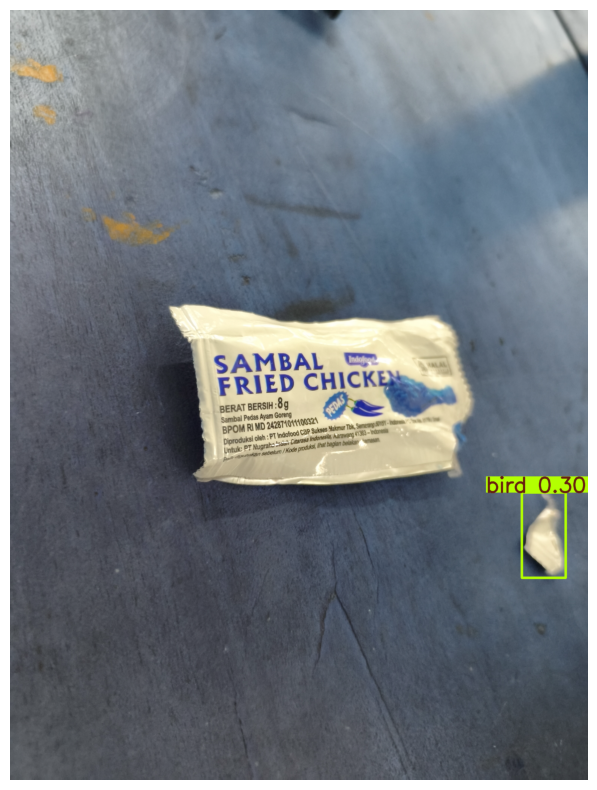

In [51]:
from PIL import Image
import numpy as np

img = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(results[0].plot())
plt.axis("off")

In [48]:
dirty_objects = ["bottle", "cup", "paper", "bag", "backpack", "ketchup", ]

detected_dirty = []

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    label = results[0].names[cls_id]

    if label in dirty_objects:
        detected_dirty.append(label)

if len(detected_dirty) == 0:
    print("🔥 KELAS BERSIH — tidak ada sampah terdeteksi")
else:
    print("⚠️ KELAS KOTOR — objek terdeteksi:", detected_dirty)

🔥 KELAS BERSIH — tidak ada sampah terdeteksi


# Google Drive Input

In [1]:
# Import all necessary libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

print("✅ Libraries imported successfully!")
print("✅ Google Drive mounted successfully!")
print("\nYour Drive is now accessible at: /content/drive/MyDrive")

Mounted at /content/drive
✅ Libraries imported successfully!
✅ Google Drive mounted successfully!

Your Drive is now accessible at: /content/drive/MyDrive


In [35]:
# Connect to your dataset from Session 4
DATA_DIR = "/content/drive/MyDrive/Data_sampah/Sampah"  # Change to your dataset path

# Verify dataset exists
if os.path.exists(DATA_DIR):
    print(f"✅ Dataset found at: {DATA_DIR}")
    things = [d for d in os.listdir(DATA_DIR)
               if os.path.isdir(os.path.join(DATA_DIR, d))]
    print(f"📁 Found {len(things)} thing(s): {things}")

    # Find first image to use as example
    if things:
        first_thing = things[2]
        thing_dir = os.path.join(DATA_DIR, first_thing)
        images = [f for f in os.listdir(thing_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if images:
            example_image = os.path.join(thing_dir[0])
            print(f"📸 Example image: {example_image}")
        else:
            example_image = None
    else:
        example_image = None
else:
    print(f"❌ Dataset not found at: {DATA_DIR}")
    example_image = None

✅ Dataset found at: /content/drive/MyDrive/Data_sampah/Sampah
📁 Found 3 thing(s): ['Sampah_saos', 'Sampah_botol ', 'Sampah_tutupbotol']
📸 Example image: /


In [36]:
things_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalthing_default.xml')

def load_image_opencv(image_path):

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image from {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

def detect_face(img):

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    trash = things_cascade.detectMultiScale(gray, 1.1, 4)
    if len(trash) > 0:
        face = max(trash, key=lambda f: f[2] * f[3])
        return face
    return None

def crop_face(img, face_coords, padding=0.2):

    x, y, w, h = face_coords
    h_img, w_img = img.shape[:2]
    pad_w = int(w * padding)
    pad_h = int(h * padding)
    x1 = max(0, x - pad_w)
    y1 = max(0, y - pad_h)
    x2 = min(w_img, x + w + pad_w)
    y2 = min(h_img, y + h + pad_h)
    return img[y1:y2, x1:x2]

def resize_to_square(img, target_size=(256, 256), method='opencv'):

    h, w = img.shape[:2]
    target_w, target_h = target_size
    scale = min(target_w / w, target_h / h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    if method == 'opencv':
        resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    else:
        pil_img = Image.fromarray(img)
        resized_pil = pil_img.resize((new_w, new_h), Image.Resampling.LANCZOS)
        resized = np.array(resized_pil)

    if new_w != target_w or new_h != target_h:
        square_img = np.zeros((target_h, target_w, 3), dtype=resized.dtype)
        y_offset = (target_h - new_h) // 2
        x_offset = (target_w - new_w) // 2
        square_img[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
        return square_img

    return resized

def normalize_image(img, method='0-1'):
    """Normalize pixel values"""
    img_float = img.astype(np.float32)
    if method == '0-1':
        return img_float / 255.0
    elif method == 'standardize':
        mean = img_float.mean()
        std = img_float.std()
        return (img_float - mean) / std
    else:
        raise ValueError(f"Unknown method: {method}")

def preprocess_image(image_path, target_size=(256, 256), normalize=True, face_aware=True):

    img = load_image_opencv(image_path)

    if face_aware:
        face_coords = detect_face(img)
        if face_coords is not None:
            img_cropped = crop_face(img, face_coords, padding=0.2)
            img_resized = resize_to_square(img_cropped, target_size)
        else:
            print(f"Warning: No thing detected in {image_path}, using center crop")
            h, w = img.shape[:2]
            size = min(h, w)
            y = (h - size) // 2
            x = (w - size) // 2
            img_cropped = img[y:y+size, x:x+size]
            img_resized = cv2.resize(img_cropped, target_size, interpolation=cv2.INTER_LINEAR)
    else:
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)

    if normalize:
        img_processed = normalize_image(img_resized)
    else:
        img_processed = img_resized.astype(np.float32)

    return img_processed

def validate_preprocessed_image(img, expected_size=(256, 256), normalized=True):
    """Validate preprocessed image meets requirements"""
    issues = []

    if len(img.shape) == 3:
        height, width, channels = img.shape
        if (width, height) != expected_size:
            issues.append(f"Size mismatch: got {width}x{height}, expected {expected_size[0]}x{expected_size[1]}")
        if channels != 3:
            issues.append(f"Expected 3 channels (RGB), got {channels}")
    else:
        issues.append(f"Expected 3D array, got shape {img.shape}")

    if normalized:
        if img.dtype not in [np.float32, np.float64]:
            issues.append(f"Expected float type, got {img.dtype}")
        if img.min() < 0 or img.max() > 1:
            issues.append(f"Normalized image should be in [0, 1], got [{img.min():.3f}, {img.max():.3f}]")

    return len(issues) == 0, issues

print("✅ All preprocessing functions loaded!")


✅ All preprocessing functions loaded!


In [37]:
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% for validation
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)

print(f"Found {train_generator.num_classes} classes in {DATA_DIR}.")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")

Found 15 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Found 3 classes in /content/drive/MyDrive/Data_sampah/Sampah.
Number of training samples: 15
Number of validation samples: 3


In [38]:
import tensorflow.keras as keras

# Get the number of classes from the train_generator
num_classes = train_generator.num_classes

# Load MobileNetV2 pre-trained model (feature extractor only)
base_model = keras.applications.MobileNetV2(
    input_shape=(150, 150, 3),  # MobileNet requires 224x224 images
    include_top=False,  # Get feature extractor, not final classifier
    weights='imagenet'  # Pre-trained on ImageNet
)

# Freeze base model (don't retrain it)
base_model.trainable = False

print(f"✅ Pre-trained MobileNetV2 loaded: {len(base_model.layers)} layers")
print("📌 Model expects images: 150x150 pixels, RGB (3 channels)")

# Build complete model with custom classifier
model = keras.Sequential([
    base_model,  # Pre-trained MobileNet (frozen)
    keras.layers.GlobalAveragePooling2D(),  # Reduces dimensions
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dropout(0.2),  # Prevents overfitting
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
    metrics=['accuracy']  # Track accuracy
)

print(f"\n✅ Model created and compiled!")
print(f"📊 Model configured for {num_classes} classes")
print("\nModel Summary:")
model.summary()

/tmp/ipython-input-3195689066.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


✅ Pre-trained MobileNetV2 loaded: 154 layers
📌 Model expects images: 150x150 pixels, RGB (3 channels)

✅ Model created and compiled!
📊 Model configured for 3 classes

Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [39]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6000 - loss: 1.1767 - val_accuracy: 0.6667 - val_loss: 0.5547
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7333 - loss: 0.6438 - val_accuracy: 1.0000 - val_loss: 0.2088
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1363 - val_accuracy: 1.0000 - val_loss: 0.0741
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0488 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 9/10
1/1

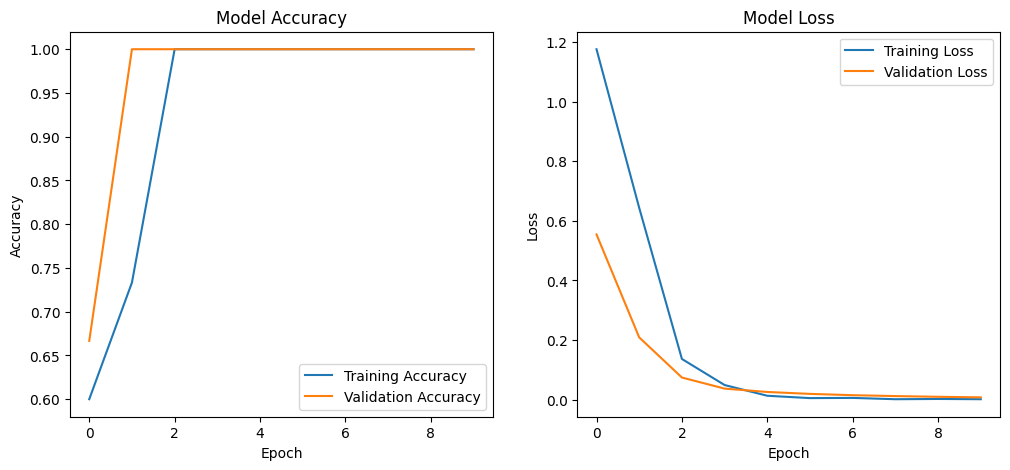

In [40]:
plt.figure(figsize=(12,5))

# Grafik Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Grafik Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


Note: example_image was invalid or not a file. Using /content/drive/MyDrive/Data_sampah/Sampah/Sampah_tutupbotol/IMG_20251202_104720.jpg instead.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi: Sampah_tutupbotol


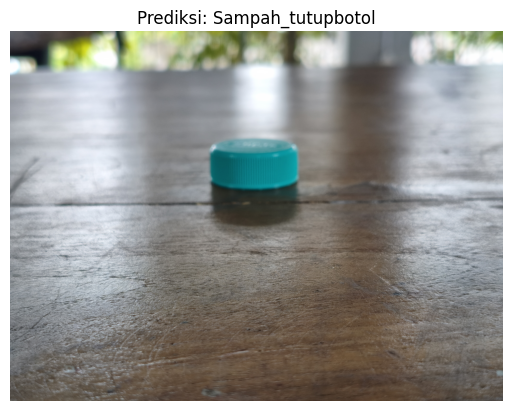

In [41]:
import os

img_path = example_image # Use a valid image path, such as the example_image defined earlier

# Check if img_path is a directory or if cv2.imread would likely fail
if not os.path.isfile(img_path):
    # If example_image is not a file, try to construct a valid image path
    # from the available variables like thing_dir and images
    if 'thing_dir' in globals() and 'images' in globals() and images:
        img_path = os.path.join(thing_dir,images[3])
        print(f"Note: example_image was invalid or not a file. Using {img_path} instead.")
    else:
        print("Error: Could not find a valid image path. Please ensure 'example_image' points to a file or that 'thing_dir' and 'images' are set correctly.")
        # Raise an error to stop execution if no valid image can be found
        raise FileNotFoundError("No valid image file found for prediction.")

img = cv2.imread(img_path)
# Add a check here as well, in case the above logic didn't catch all cases
if img is None:
    raise ValueError(f"Failed to load image from {img_path}. Please check the path and file integrity.")

img_resized = cv2.resize(img, (150, 150))
img_norm = img_resized / 255.0
img_input = np.expand_dims(img_norm, axis=0)

prediction = model.predict(img_input)
class_index = np.argmax(prediction)
class_label = list(train_generator.class_indices.keys())[class_index]

print("Prediksi:", class_label)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediksi: {class_label}")
plt.axis("off")
plt.show()